### Filtering by geographical criteria

In [2]:
import numpy as np
import pandas as pd
#from geojson import Feature, FeatureCollection#, Point
import json
import geojson
from shapely.geometry import Point, Polygon, LineString, MultiPoint, mapping
#import shapely
import geopandas as gpd
#import geojsonio

I've exported __[El Retiro park shape](https://www.openstreetmap.org/way/4088755)__ in **GeoJSON** format from _OpenStreetMap_ by using the tool __[Overpass_turbo](http://overpass-turbo.eu/)__.
```c
// Retrieving El Retiro park from OSM
[out:json][timeout:25];
(
  // Query for El Retiro, whose way id is 4088755
  way(4088755);
);
// Print results
out body;
>;
// Returns geometry information of elements, but ignores the tags of the inner nodes
out skel qt;
```
![Retiro Park in OSM](img/osm-retiro-small.jpg)

In [3]:
#Let's start using GeoPandas. This is a very simple GeoDataFrame whose main geometry is the POLYGON with only one item: El Retiro
raw_retiro=gpd.read_file('data/retiro.json')
raw_retiro

,id,@id,access,alt_name,barrier,leisure,name,name:en,name:es,name:it,name:pl,name:ru,opening_hours,place,source:opening_hours,wikidata,wikipedia,geometry
0,way/4088755,way/4088755,public,Parque de El Retiro,fence,park,Parque del Retiro,El Retiro Park,Parque del Retiro,Parco del Retiro,Park Retiro,Буэн-Ретиро,Oct-Mar 06:00-22:00; Apr-Sep 06:00-24:00,suburb,survey,Q1131807,es:Parque del Retiro de Madrid,"POLYGON ((-3.6858982 40.4087709, -3.681906 40...."


In [253]:
#GeoPandas implements most of the Shapely functions to deal with geometries
#
inner_retiro=raw_retiro.buffer(-0.0003)
inner_retiro

0    POLYGON ((-3.688492065704879 40.41705146092648...
dtype: object

In [254]:
#Back to dict format by using the Shapely function "mapping" then dumping to GeoJSON
#Let's take a look and make some manual adjustments on geojson.io
json.dumps(mapping(inner_retiro))

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-3.6884920657048785, 40.41705146092648], [-3.6883700816277276, 40.418165753370175], [-3.6883694284294943, 40.41817240414757], [-3.6882921834511726, 40.41906048150703], [-3.6882592113406454, 40.41907157635415], [-3.6881498113406455, 40.41911637635415], [-3.688115965461321, 40.41913278445701], [-3.687928465461321, 40.419238684457014], [-3.687906771591823, 40.41925218696872], [-3.687886305459, 40.41926748661589], [-3.6878672155427803, 40.41928447240097], [-3.6878444987612995, 40.41930648866623], [-3.6877890987612996, 40.41936018866623], [-3.687764296635444, 40.41938737282856], [-3.6876970966354436, 40.41947077282856], [-3.6876726215751394, 40.419506044036986], [-3.6876176215751397, 40.41959884403698], [-3.6876034144998266, 40.41962586110055], [-3.6875920263742485, 40.41965418199934], [-3.687560568184379, 40.419745598118496], [-3.686291441964994, 40

Some manual adjustments were made using the embedded editor on __[geojson.io](http://geojson.io)__ and saved as **_retiro_\__retouched.json_**

In [7]:
#Now we can use the retouched polygon defining the park perimeter
retiro=gpd.read_file('data/retiro_retouched.json')
retiro

,id,geometry
0,0,POLYGON ((-3.686010599127637 40.42036804935916...


In [22]:
#We don't need but the geometry containing the polygon
retiro.drop(columns=retiro.columns.difference(['geometry']), inplace=True)
retiro

,geometry
0,POLYGON ((-3.686010599127637 40.42036804935916...


In [23]:
type(retiro)

geopandas.geodataframe.GeoDataFrame

In [24]:
#retiro.crs

#retiro.to_crs(epsg=3857)

In [71]:
borde=raw_retiro.buffer(-0.00012).difference(raw_retiro.buffer(-0.0003))

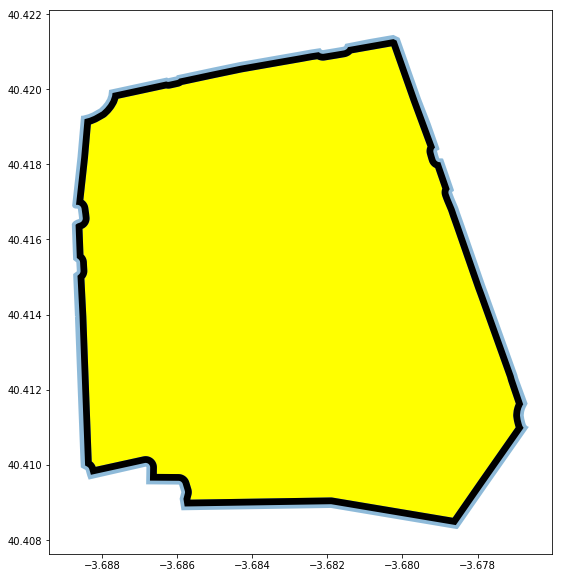

In [255]:
#Our Retiro perimeter
#Using a pure WGS 84 projection, that's why it looks "wider than on Google Maps", where a spherical Mercator projection is used.
ax=retiro.plot(figsize=(10,10), alpha=0.5)
#raw_retiro.plot(ax=ax, color='red', alpha=0.5)
inner_retiro.buffer(-0.00012).plot(ax=ax, color='red', alpha=1)
raw_retiro.buffer(-0.0003).plot(ax=ax, color='yellow', alpha=1)
borde.plot(ax=ax, color='black', alpha=1)

#inner_retiro.plot(ax=ax, color='yellow', alpha=1)

In [ ]:
json.dumps(mapping(raw_retiro.buffer(-0.0003)))

![Perímetro del Retiro](img/retiro.jpg)

In [412]:
madrid=gpd.read_file('data/madrid.json')
madrid

,id,@id,addr:postcode,admin_level,boundary,ine:municipio,is_in,is_in:country,is_in:province,is_in:region,...,name:en,name:es,name:ko,name:ru,population,type,wikidata,wikipedia,@relations,geometry
0,relation/5326784,relation/5326784,28001,8,administrative,28079,Madrid;Comunidad de Madrid;Spain;Europe,Spain,Madrid,Comunidad de Madrid,...,Madrid,Madrid,마드리드,Мадрид,3233527,boundary,Q2807,es:Madrid,None,"POLYGON ((-3.5311901 40.4200833, -3.5308782 40..."
1,node/21068295,node/21068295,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"[ { ""role"": ""admin_centre"", ""rel"": 5326784, ""r...",POINT (-3.7035825 40.4167047)


In [413]:
#We don't need but the geometry containing the polygon
madrid.drop(columns=madrid.columns.difference(['geometry']), inplace=True)
madrid.drop(index=1, inplace=True)
madrid

,geometry
0,"POLYGON ((-3.5311901 40.4200833, -3.5308782 40..."


In [2]:
#madrid
madrid=madrid.simplify(0.005)
madrid.plot(figsize=(7,7))

NameError: name 'madrid' is not defined

In [ ]:
#Guardo los trayectos sin track GPS para posible uso
ridesNoGPS = rides[rides['track'].isnull()]

In [ ]:
len(ridesNoGPS)

In [ ]:
#Saved in a file and we free some memory
ridesNoGPS.to_json('data/agosto_noGPS.json', orient='records', date_format='iso', lines=True)
del(ridesNoGPS)

In [ ]:
#Trabajamos sobre los trayectos con itinerario GPS disponible
rides = rides.dropna(subset=['track'])

In [ ]:
len(rides)

Vamos a completar el track con las coordenadas de las estaciones de origen _(primer punto, t=0)_ y destino _(último punto, t=travel_\__time)_. Para usar los datos más actualizados, tomamos los datos de ocupación de estaciones del propio mes de agosto

In [303]:
#Leo y tomo la primera línea del json (estado de las estaciones la primera horas del mes), no necesito más
stations=next(pd.read_json('data/Bicimad_Estacions_201808.json', lines=True, chunksize=1))['stations'].tolist()

In [ ]:
stations=pd.DataFrame(stations[0])
stations

In [305]:
#Latitude and longitude must be numeric in order to do geometric manipulations
stations[['latitude','longitude']]=stations[['latitude','longitude']].astype('float')

In [306]:
stations.dtypes

activate                int64
address                object
dock_bikes              int64
free_bases              int64
id                      int64
latitude              float64
light                   int64
longitude             float64
name                   object
no_available            int64
number                 object
reservations_count      int64
total_bases             int64
dtype: object

In [ ]:
#No hacen falta todas las columnas
stations.drop(stations.columns.difference(['address','id','latitude','longitude','name','number']), axis=1, inplace=True)

In [308]:
stations['address']=stations['address'].str.replace('nº ','').str.upper()
stations

,address,id,latitude,longitude,name,number
0,PUERTA DEL SOL 1,1,40.416896,-3.702425,Puerta del Sol A,1a
1,PUERTA DEL SOL 1,2,40.417001,-3.702421,Puerta del Sol B,1b
2,CALLE MIGUEL MOYA 1,3,40.420589,-3.705842,Miguel Moya,2
3,PLAZA DEL CONDE SUCHIL 2-4,4,40.430294,-3.706917,Plaza Conde Suchil,3
4,CALLE MANUELA MALASAÑA 5,5,40.428552,-3.702587,Malasaña,4
5,CALLE FUENCARRAL 108,6,40.428528,-3.702060,Fuencarral,5
6,CALLE HORTALEZA 63,7,40.424148,-3.698447,Colegio Arquitectos,6
7,CALLE HORTALEZA 75,8,40.425191,-3.697771,Hortaleza,7
8,PLAZA DE ALONSO MARTÍNEZ 5,9,40.427868,-3.695440,Alonso Martínez,8
9,PLAZA DE SAN MIGUEL 9,10,40.415606,-3.709508,Plaza de San Miguel,9


In [309]:
#Confirmamos que no hay ids repetidos en el listado de estaciones
stations['id'].duplicated(keep=False).any()

False

In [345]:
from copy import deepcopy

In [346]:
def improve_track(ride, stations):
    station_orig = stations[stations['id'] == ride.idunplug_station].iloc[0]
    station_dest = stations[stations['id'] == ride.idplug_station].iloc[0]
    feature_orig={'geometry': {'type': 'Point', 'coordinates': [station_orig.longitude, station_orig.latitude]},
                  'type': 'Feature',
                  'properties': {'var': station_orig.address,
                                 'speed': 0,
                                 'secondsfromstart': 0}}
    feature_dest={'geometry': {'type': 'Point', 'coordinates': [station_dest.longitude, station_dest.latitude]},
                  'type': 'Feature',
                  'properties': {'var': station_dest.address,
                                 'speed': 0,
                                 'secondsfromstart': ride.travel_time}}
    improved_track = deepcopy(ride.track)
    improved_track['features'].insert(0,feature_dest)
    improved_track['features'].append(feature_orig)
    return improved_track

***
*** Prueba track enriquecido ***

***

In [347]:
rides.count()

_id                 224536
ageRange            224536
idplug_station      224536
idunplug_station    224536
track               224536
travel_time         224536
unplug_hourTime     224536
user_day_code       224536
user_type           224536
zip_code            115959
dtype: int64

In [348]:
# /!\ Wall time: 5min 36s (it was more than 14min with strings instead of np.float64!)
%time rides['full_track'] = rides.apply(lambda row: improve_track(row, stations), axis=1)

Wall time: 5min 36s


In [349]:
rides.dtypes

_id                              object
ageRange                       category
idplug_station                 category
idunplug_station               category
track                            object
travel_time                       int64
unplug_hourTime     datetime64[ns, CET]
user_day_code                    object
user_type                      category
zip_code                         object
full_track                       object
dtype: object

In [350]:
#The dataframe containing the enhanced tracks is backed up in order to not repeat that heavy treatment in future runs
# /!\ Wall time: 52s
#%time rides.to_json('data/cleanFullTracksAugust.json', orient='records', date_format='iso', lines=True)

Wall time: 33.2 s


In [27]:
#Esta es la lectura de una versión limpia pero sólo con los trayectos CON track y además la versión enriquecida (full_track)
# /!\ Wall time: 1min 31s
rides = pd.read_json('data/cleanFullTracksAugust.json', lines=True, dtype={'zip_code':object}, convert_dates=['unplug_hourTime'])

In [28]:
rides.dtypes

_id                         object
ageRange                     int64
full_track                  object
idplug_station               int64
idunplug_station             int64
track                       object
travel_time                  int64
unplug_hourTime     datetime64[ns]
user_day_code               object
user_type                    int64
zip_code                    object
dtype: object

In [29]:
#JSON I/O process couldn't deal with the timezone. We localize our datetime on the Central European Time.
rides['unplug_hourTime']=pd.Series(pd.DatetimeIndex(rides['unplug_hourTime']).tz_localize('UTC').tz_convert('CET'))

In [30]:
#pandas-dev Issue #21892 doesn't allow to deal with categories as a dtype on read_json, so we make the conversion here
rides[['ageRange','idplug_station','idunplug_station','user_type']]=\
rides[['ageRange','idplug_station','idunplug_station','user_type']].astype('category')

In [31]:
#We check the right types were kept.
#Strings and dict as objets, time travel as a number, datetime on the right timezone and four categories with well-known values: 
rides.dtypes

_id                              object
ageRange                       category
full_track                       object
idplug_station                 category
idunplug_station               category
track                            object
travel_time                       int64
unplug_hourTime     datetime64[ns, CET]
user_day_code                    object
user_type                      category
zip_code                         object
dtype: object

In [32]:
rides.count()

_id                 224536
ageRange            224536
full_track          224536
idplug_station      224536
idunplug_station    224536
track               224536
travel_time         224536
unplug_hourTime     224536
user_day_code       224536
user_type           224536
zip_code            115959
dtype: int64

In [33]:
rides['user_type'].value_counts()

1    202609
3     16186
2      5741
Name: user_type, dtype: int64

In [232]:
sample=rides[rides.user_type==3].reset_index()

In [76]:
sample=rides[rides.user_type==1].sample(3000,random_state=334).reset_index()

In [77]:
sample.head()

,index,_id,ageRange,full_track,idplug_station,idunplug_station,track,travel_time,unplug_hourTime,user_day_code,user_type,zip_code
0,178035,5b847a382f384345a495bb82,3,"{'type': 'FeatureCollection', 'features': [{'g...",56,9,"{'type': 'FeatureCollection', 'features': [{'g...",524,2018-08-23 17:00:00+02:00,a7824d5a00a18d3e30c4ec7df767d463dae142e5d41035...,1,28012
1,50763,5b6f62732f38434d381dbb08,4,"{'type': 'FeatureCollection', 'features': [{'g...",81,16,"{'type': 'FeatureCollection', 'features': [{'g...",1004,2018-08-07 07:00:00+02:00,a5cf890e2653c3dd777f0f976b4c4a6dcd15829a6fc45b...,1,28015
2,84291,5b73568b2f38434438ae90af,4,"{'type': 'FeatureCollection', 'features': [{'g...",128,90,"{'type': 'FeatureCollection', 'features': [{'g...",556,2018-08-10 22:00:00+02:00,626425887b0c419e0c01a701601138933cb71c73e7d1af...,1,28045
3,168503,5b8329252f3843545085c13f,4,"{'type': 'FeatureCollection', 'features': [{'g...",80,123,"{'type': 'FeatureCollection', 'features': [{'g...",1788,2018-08-22 17:00:00+02:00,0837dd93fd5bfd67bc2430d78e78bc166714fdaa4478a1...,1,28024
4,46030,5b6e10782f384348b887712f,5,"{'type': 'FeatureCollection', 'features': [{'g...",149,140,"{'type': 'FeatureCollection', 'features': [{'g...",782,2018-08-06 16:00:00+02:00,b7b4b7f0b8d497a9328eb2020116721672695215765d02...,1,28026


In [99]:
def intersectsRetiro(path=None):
    points=MultiPoint(gpd.GeoDataFrame.from_features(path['features']).geometry)
    return raw_retiro.buffer(-0.0003).intersects(points).any()
#    return borde.intersects(points).any() and not raw_retiro.buffer(-0.0003).intersects(points).any()

In [100]:
sample['inRetiro']=pd.Series(map(intersectsRetiro, sample['full_track']))

In [101]:
sample['inRetiro'].value_counts()

False    2718
True      282
Name: inRetiro, dtype: int64

In [120]:
pointsInRetiro=gpd.GeoSeries()
pointsNotInRetiro=gpd.GeoSeries()

In [236]:
for r in sample[sample['inRetiro']==True]['full_track'] :
    geoRide=gpd.GeoSeries(LineString(gpd.GeoDataFrame.from_features(r['features'], crs='WGS84')['geometry']))
    pointsInRetiro=pointsInRetiro.append(geoRide, ignore_index=True)

In [127]:
for r in sample[sample['inRetiro']==False]['full_track'] :
    geoRide=gpd.GeoSeries(gpd.GeoDataFrame.from_features(r['features'], crs='WGS84')['geometry'])
    pointsNotInRetiro=pointsNotInRetiro.append(geoRide, ignore_index=True)

In [ ]:
import folium

In [220]:
mapa = folium.Map([40.4155068, -3.6840015],
                  zoom_start=13, tiles=None)

#points = folium.features.GeoJson(json.dumps(mapping(pointsNotInRetiro)), smooth_factor=2,
 #                               style_function=lambda x: {'color' : 'red',
  #                                  'weight' : 0.8,
   #                                 'opacity': 0.6})

for p in pointsNotInRetiro:
    hey=folium.features.GeoJson(json.dumps(mapping(p)),
                                smooth_factor=2)
    hey.style_function=lambda x: {'color' : 'red',
                                  'weight' : 0.8,
                                  'opacity': 0.5}
    mapa.add_child(hey)

mapa.save('data/folium2.html')
#mapa

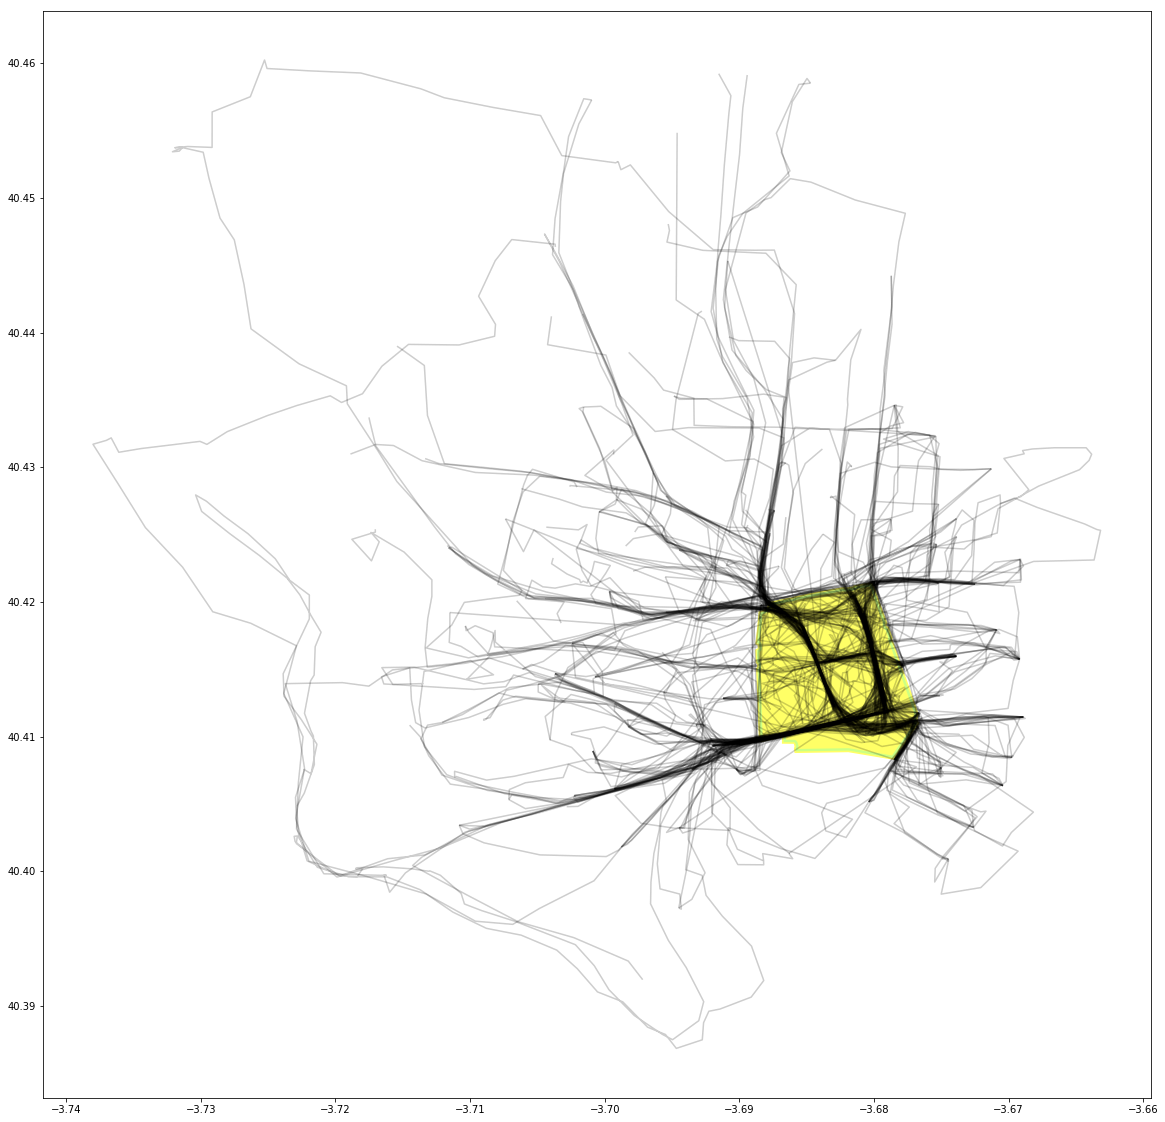

In [256]:
ax=raw_retiro.plot(figsize=[20,20], color='yellow', alpha=0.6)
#add_basemap(ax, zoom=10)
borde.plot(ax=ax, color='cyan', alpha=0.2)
pointsInRetiro.plot(ax=ax, color='black', alpha=0.1)
#pointsNotInRetiro.plot(ax=ax, color='red', alpha=0.1)

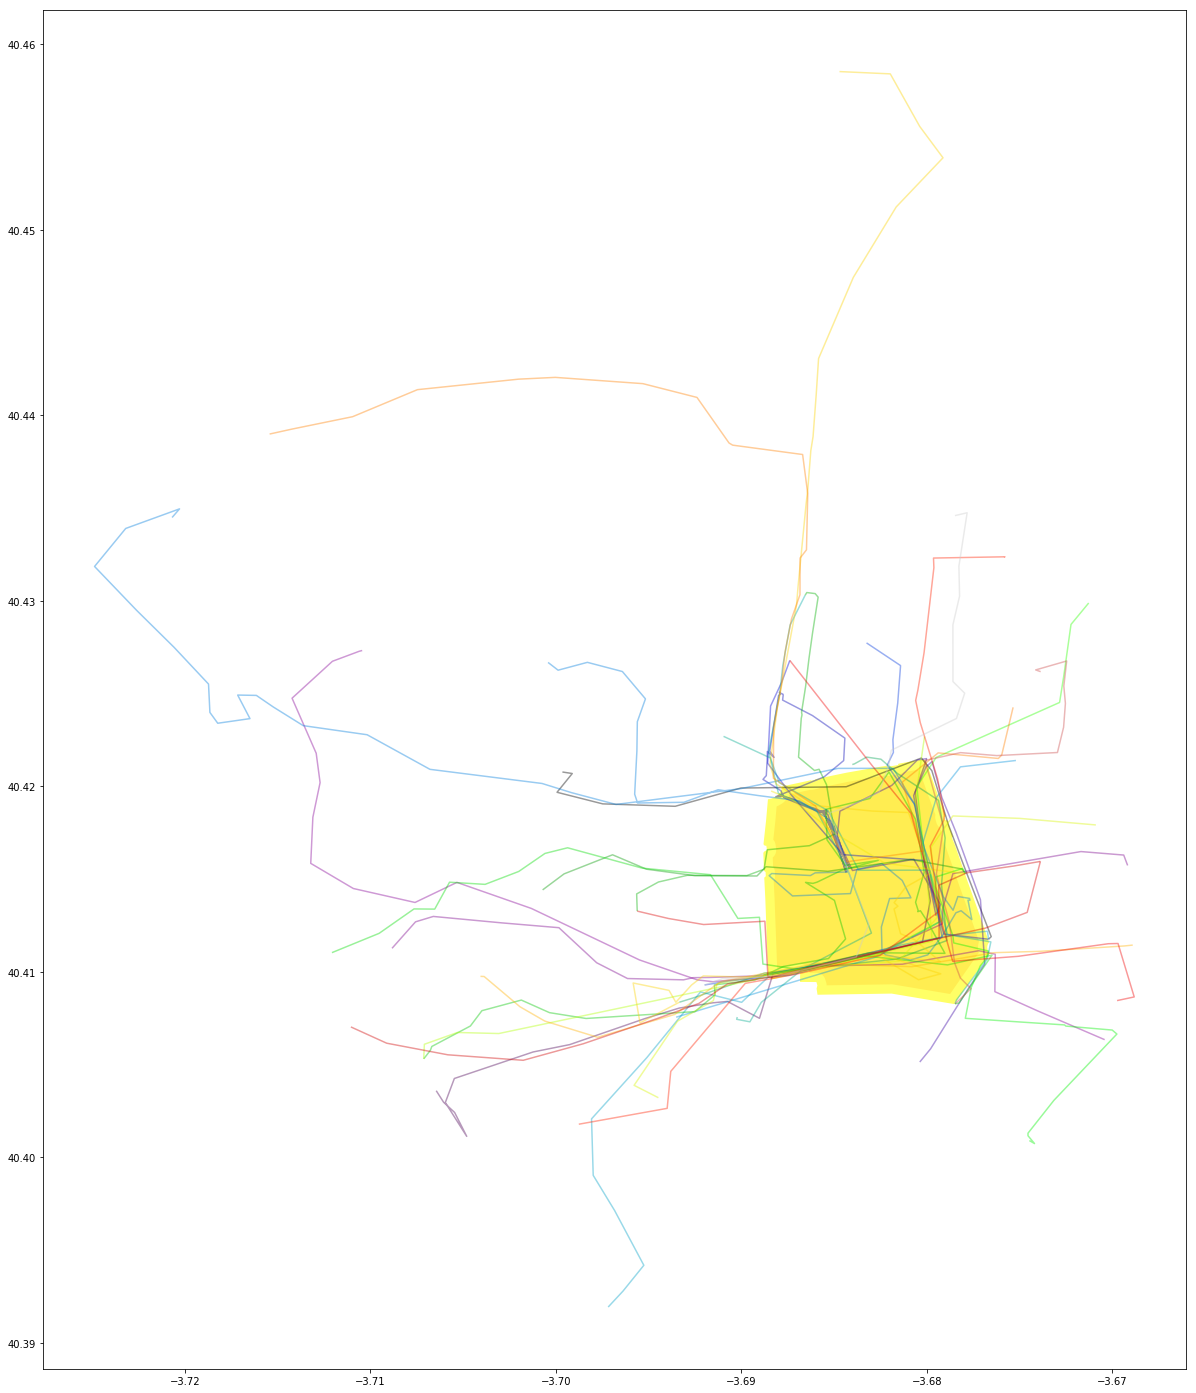

In [326]:
ax=raw_retiro.plot(figsize=[25,25], color='yellow', alpha=0.6)
#add_basemap(ax, zoom=10)
raw_retiro.buffer(-0.0005).plot(ax=ax, color='orange', alpha=0.2)
pointsInRetiro.plot(ax=ax, cmap='nipy_spectral', alpha=0.4)
#pointsNotInRetiro.plot(ax=ax, color='red', alpha=0.1)

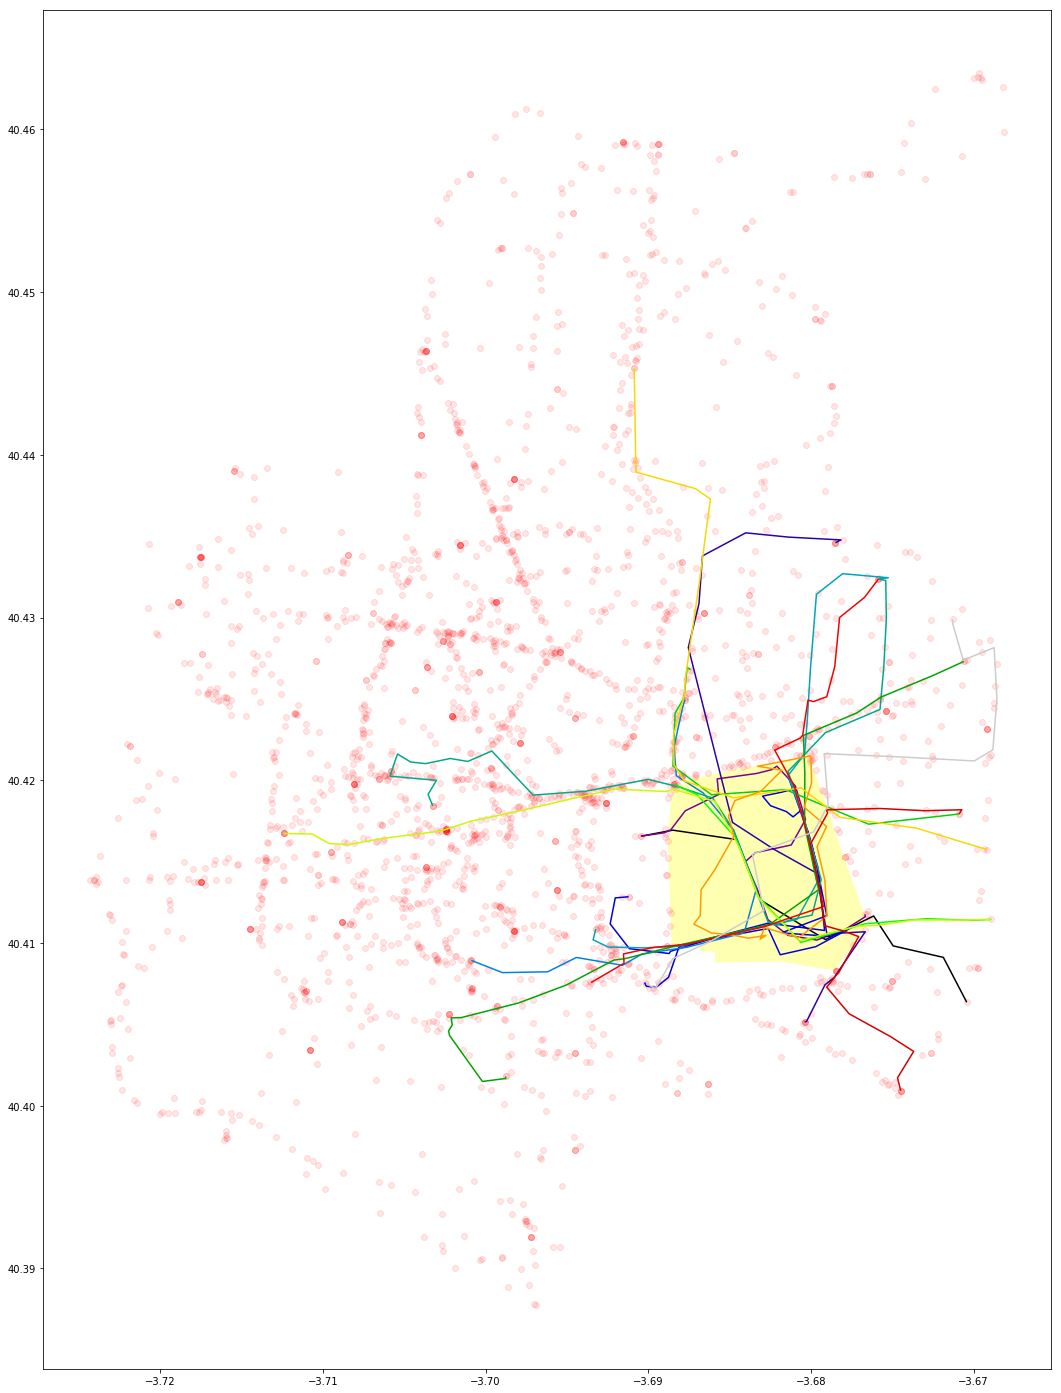

In [231]:
ax=retiro.plot(figsize=[25,25], color='yellow', alpha=0.3)
#add_basemap(ax, zoom=10)
pointsInRetiro.plot(ax=ax, cmap='nipy_spectral', alpha=1)
pointsNotInRetiro.plot(ax=ax, color='red', alpha=0.1)

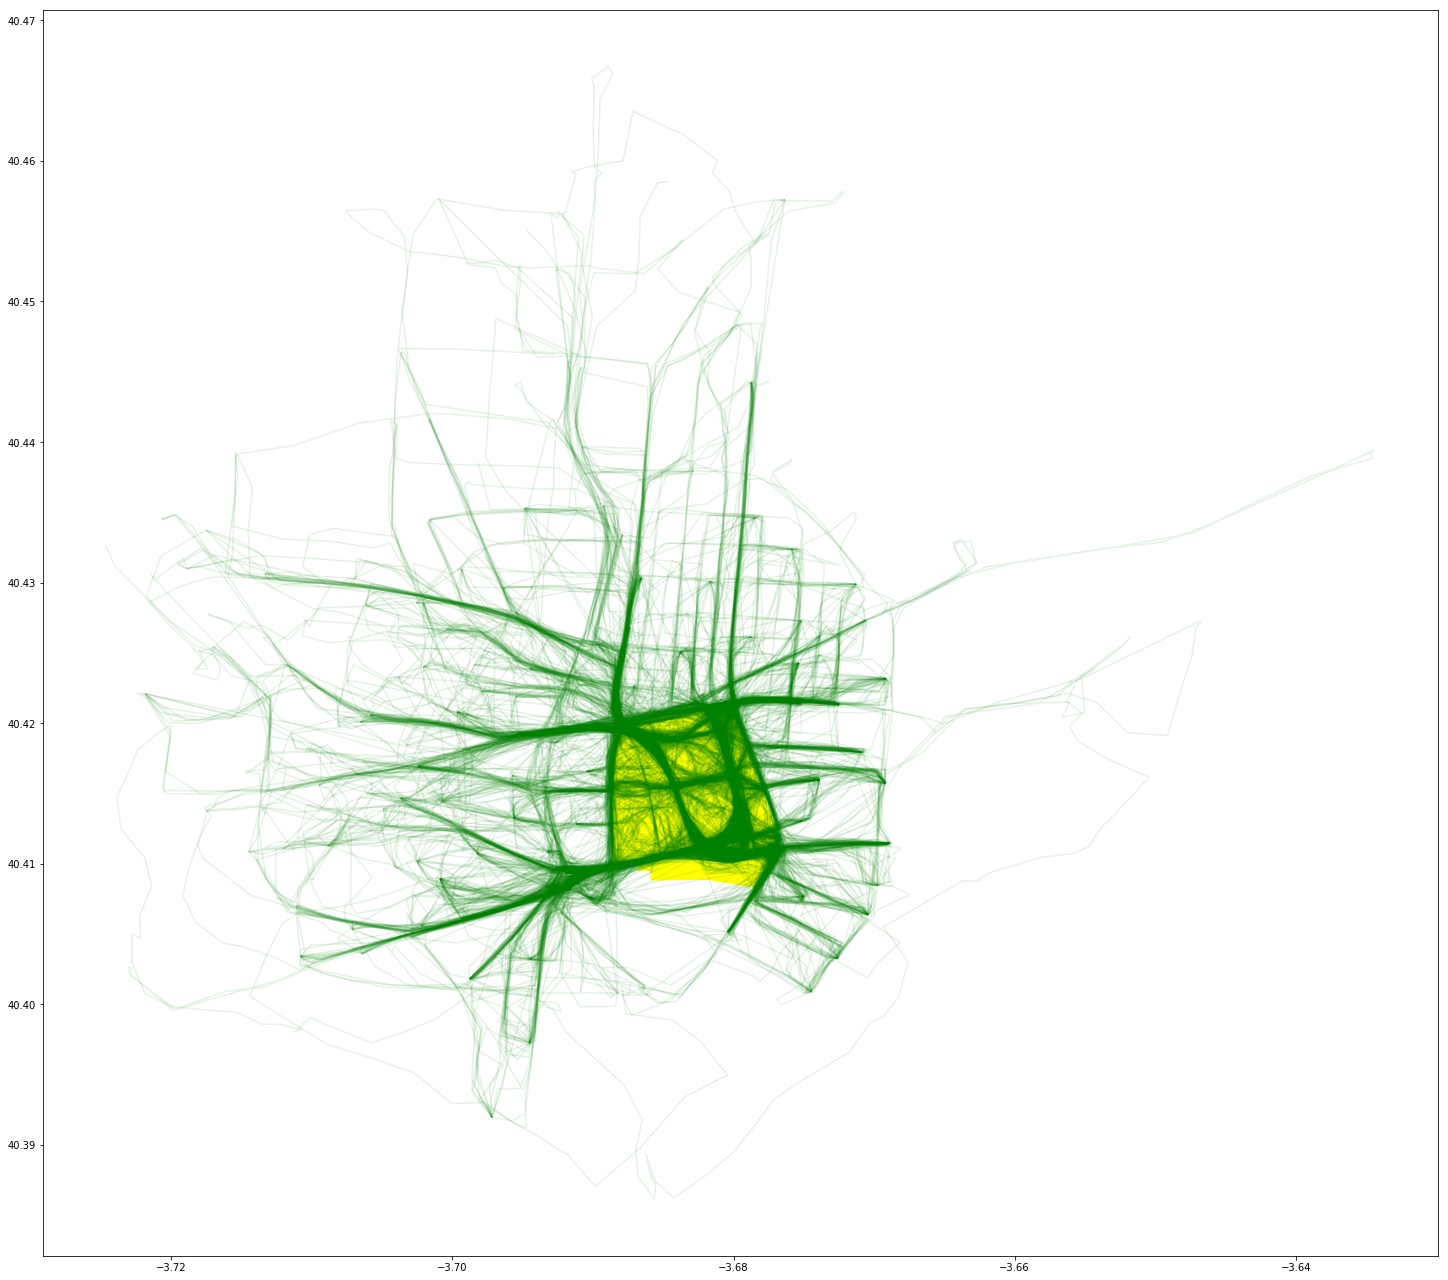

In [51]:
ax=retiro.plot(figsize=[25,25], color='yellow', alpha=1)
#add_basemap(ax, zoom=10)
pointsInRetiro.plot(ax=ax, color='green', alpha=0.1)
#pointsNotInRetiro.plot(ax=ax, color='red', alpha=0.1)

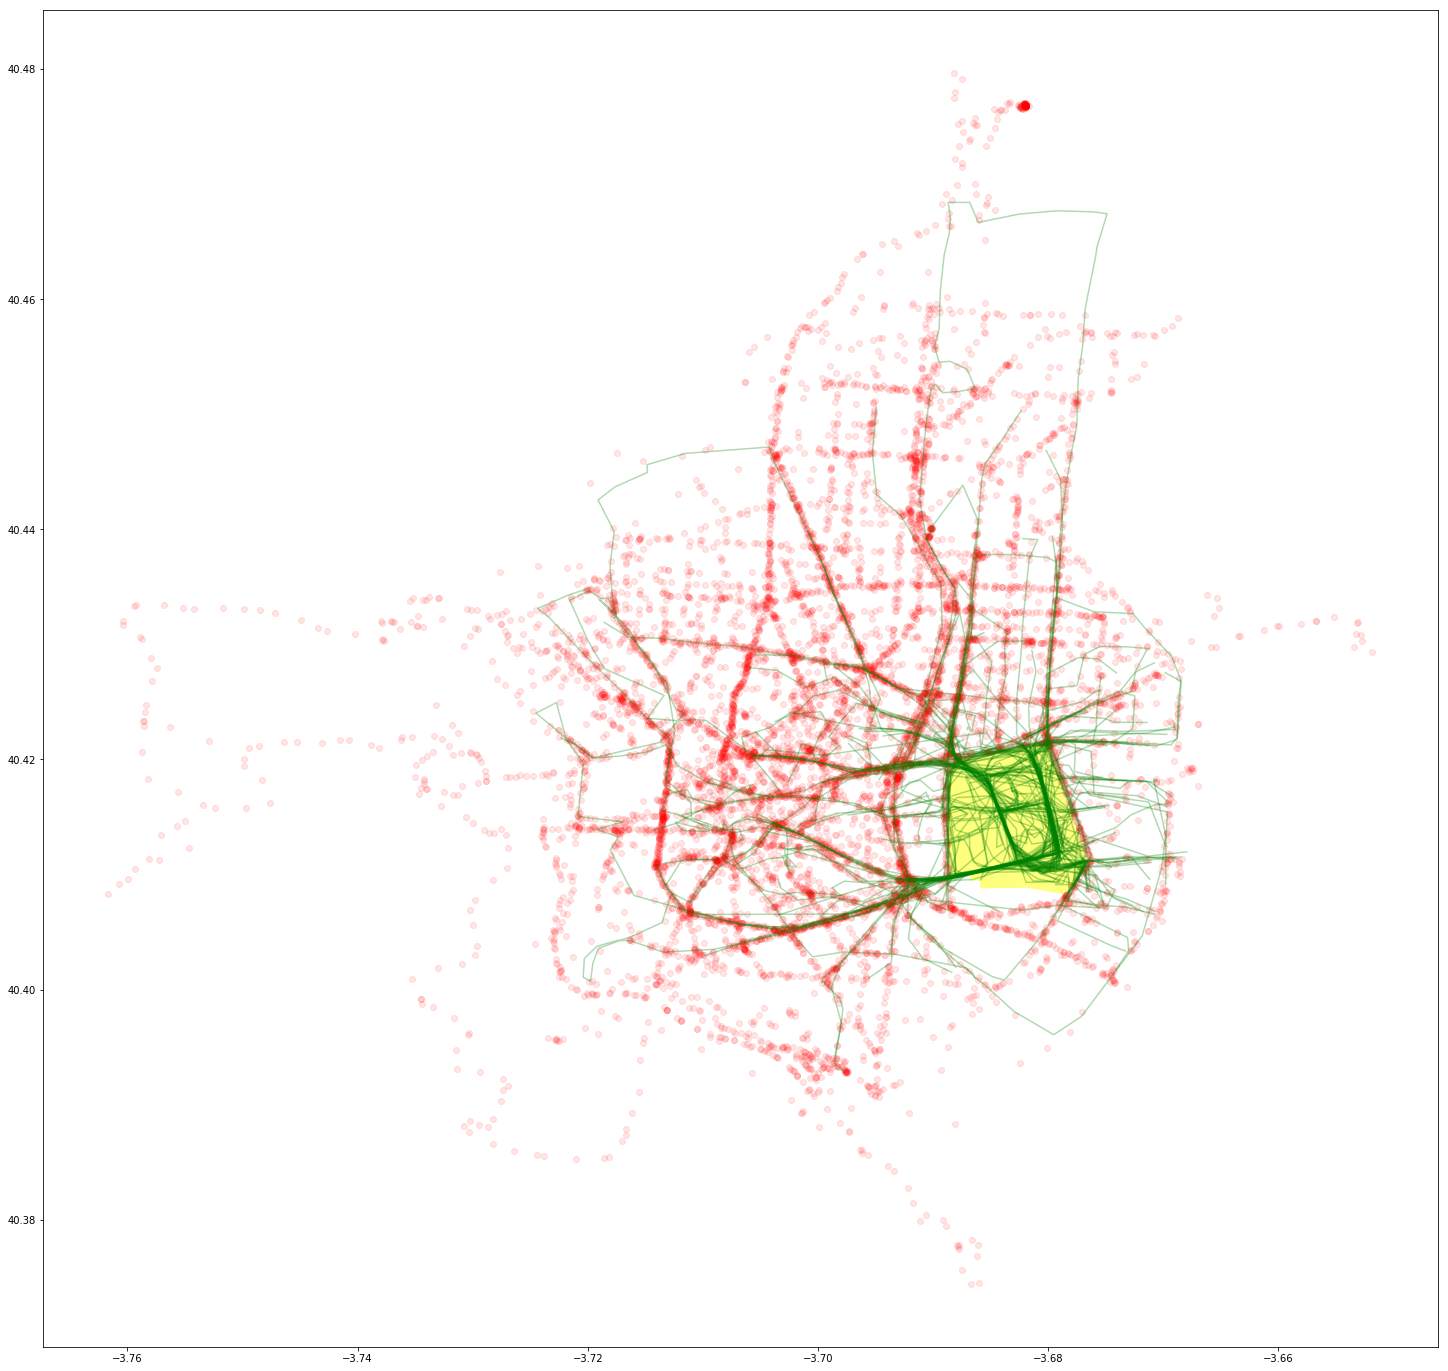

In [256]:
ax=retiro.plot(figsize=[25,25], color='yellow', alpha=0.5)
pointsInRetiro.plot(ax=ax, color='green', alpha=0.3)
pointsNotInRetiro.plot(ax=ax, color='red', alpha=0.1)

In [257]:
len(pointsInRetiro)

138

In [ ]:
list(sample[sample['inRetiro']].track)

In [136]:
retiro.intersects(gpd.GeoDataFrame.from_features(sample.iloc[0]['track']['features']).geometry).any()

False

In [104]:
sample['inRetiro']=map(intersectsRetiro,retiro.intersects(gpd.GeoDataFrame.from_features(sample.iloc[0]['track']['features'], crs='WGS84')).any()

False

In [83]:
retiro.intersects(Point([-3.67979499972222, 40.4191539997222]))

0    True
dtype: bool

In [ ]:
retiro.intersects(p1500).value_counts()

In [ ]:
type(audf.iloc[7500:9000]['geometry'])

In [ ]:
retiropol=retiro['geometry'][0]

#### Ojo aquí, parece que ya sí

In [ ]:
audf.intersects(retiropol).value_counts()

In [ ]:
retiro.contains(Point([-3.683297064857466, 40.41493935]))

In [ ]:
retiro.contains(test['geometry'])

In [ ]:
test['geometry'][1]=Point([-3.683297064857466, 40.41493935])

In [ ]:
retiro.representative_point()

In [ ]:
test.index=np.zeros(test.index.size)
test.index

In [ ]:
retiro

In [ ]:
p1500['geometry'].intersects(retiro)

In [ ]:
test=gpd.GeoDataFrame.from_features([
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -3.6764931678771973,
          40.41138847106793
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -3.683981895446777,
          40.41467234395794
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -3.6872434616088867,
          40.41973670935866
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Point",
        "coordinates": [
          -3.689603805541992,
          40.41475403029547
        ]
      }
    }
  ])

In [ ]:
test

In [ ]:
MultiPoint(ridea['geometry'])

In [ ]:
Polygon(retiro['geometry'][0])

```In [1]: from geojson import Feature, Point, FeatureCollection
In [2]: my_feature = Feature(geometry=Point((1.6432, -19.123)), properties={"country": "Spain"})
In [3]: my_other_feature = Feature(geometry=Point((-80.234, -22.532)), properties={'country': 'Brazil'})
In [4]: collection = FeatureCollection([my_feature, my_other_feature])
In [6]: import geopandas
In [7]: geopandas.GeoDataFrame.from_features(collection['features'])
Out[7]:
  country                 geometry
0   Spain   POINT (1.6432 -19.123)
1  Brazil  POINT (-80.234 -22.532)```

In [ ]:
#Por cada trayecto creo que debo meter la sucesión de puntos como una GeoSeries
rides.loc[96274]['track']

In [ ]:
{
         "type": "Polygon",
         "coordinates": [
             [
                 [100.0, 0.0],
                 [101.0, 0.0],
                 [101.0, 1.0],
                 [100.0, 1.0],
                 [100.0, 0.0]
             ]
         ]
     }